In [1]:
import pandas as pd
import numpy  as np

In [3]:
df=pd.read_csv('homeprices_banglore.csv')
df.shape

(20, 3)

In [4]:
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [7]:
df['price'].values.reshape(20,1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [8]:
#from sklearn.preprocessing import MInMaxscaler
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(-1,1))

scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
scaled_y=scaled_y.reshape(20,)
scaled_y.shape

(20,)

In [11]:
def batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    #print(w)
    b=0
    #print(b)
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        y_predicted=np.dot(w,X.T)+b
        w_gred=-(2/total_samples)*(np.dot(X.T,(y_true-y_predicted)))
        b_gred=-(2/total_samples)*np.sum((y_true-y_predicted))
        w=w-learning_rate*w_gred
        b=b-learning_rate*b_gred
        cost=np.mean(np.square(y_true-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"weight={w} bias={b} epoch={i} cost={cost}")
    return w,b,cost,cost_list,epoch_list

    

In [13]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y,1000)
w, b, cost

weight=[0.99551317 0.99445655] bias=-0.009603223499361428 epoch=0 cost=0.2768777174681
weight=[0.95630831 0.94626642] bias=-0.09163530752945695 epoch=10 cost=0.16573507027671064
weight=[0.92561534 0.90895369] bias=-0.1526797697123304 epoch=20 cost=0.10212908135956808
weight=[0.9013738  0.87987065] bias=-0.19789162051248474 epoch=30 cost=0.06564235879682481
weight=[0.88202714 0.8570175 ] bias=-0.23116355287977375 epoch=40 cost=0.04463022365578522
weight=[0.86639945 0.8388837 ] bias=-0.2554349736249456 epoch=50 cost=0.03245122421764872
weight=[0.85360224 0.82432823] bias=-0.27292538144121864 epoch=60 cost=0.025317339083010492
weight=[0.8429641  0.81248913] bias=-0.2853106120900698 epoch=70 cost=0.021067914076635823
weight=[0.83397757 0.80271516] bias=-0.2938559373058315 epoch=80 cost=0.01847041893523527
weight=[0.826259   0.79451428] bias=-0.2995165799588363 epoch=90 cost=0.016821657535428185
weight=[0.81951826 0.78751463] bias=-0.30301362222683875 epoch=100 cost=0.015720331469182485
wei

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.0048654808183488454)

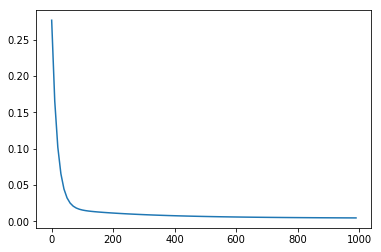

In [14]:
import matplotlib.pyplot  as plt
%matplotlib inline
plt.plot(epoch_list,cost_list)

In [15]:
w,b

(array([0.66469087, 0.60541671]), -0.17792104056392882)

In [16]:
w

array([0.66469087, 0.60541671])

In [19]:
def predict(area,bedrooms,w,b):
    
    scaled_X = sx.transform(np.array([[area,bedrooms]]))
    print(scaled_X)
    scaled_price = w[0] * scaled_X[0][0] + w[1] * scaled_X[0][1] + b
    print(scaled_price)
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    x=sy.inverse_transform([[scaled_price]])
    print(x)
    return x[0][0]

predict(2600,4,w,b)

[[0.62068966 0.75      ]]
0.688708236289262
[[124.9756119]]


/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


124.97561189905038

In [55]:
np.array([[2600,4]]).shape

(1, 2)

In [20]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"weight={w} bias={b} epoch={i} cost={cost}")
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

weight=[0.99996957 0.99992645] bias=-0.0002941890166028097 epoch=0 cost=0.08654717748972825
weight=[0.97951584 0.97462136] bias=-0.04509167632351705 epoch=100 cost=0.16824287984304506
weight=[0.96170352 0.95301533] bias=-0.08264347015573914 epoch=200 cost=0.13260600149025722
weight=[0.9427199  0.93100112] bias=-0.1196610449140834 epoch=300 cost=0.010504132605136269
weight=[0.92765379 0.91266991] bias=-0.14940348597180989 epoch=400 cost=0.09632386759227228
weight=[0.91562558 0.89820425] bias=-0.17218849393457072 epoch=500 cost=0.015593523756399106
weight=[0.90353428 0.88383415] bias=-0.19316797110643172 epoch=600 cost=0.002089185864342971
weight=[0.8919542  0.87021028] bias=-0.21369873143366608 epoch=700 cost=0.038527472974175504
weight=[0.88415484 0.8608504 ] bias=-0.22743013592959563 epoch=800 cost=0.031020156744455574
weight=[0.87490264 0.85025722] bias=-0.24190101035610811 epoch=900 cost=0.012041201214123201
weight=[0.86593039 0.84032317] bias=-0.25582563296820376 epoch=1000 cost=0.

(array([0.70572378, 0.67443584]), -0.22965609088851288, 0.006454728192235841)

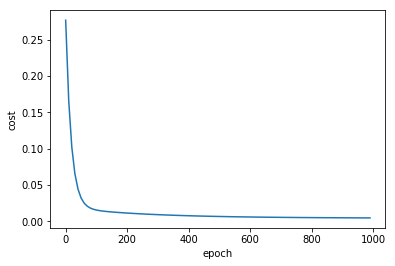

In [21]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [22]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"weight={w} bias={b} epoch={i} cost={cost}")
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

weight=[0.98272719 0.97865522] bias=-0.03692925321568331 epoch=0 cost=0.27012008877569205
weight=[0.87706879 0.85112872] bias=-0.23940359682005735 epoch=10 cost=0.014418163271753718
weight=[0.83158953 0.80007822] bias=-0.29590424741147864 epoch=20 cost=0.004910755879389396
weight=[0.80674457 0.77462341] bias=-0.3053994365564433 epoch=30 cost=0.023075754822438097
weight=[0.78927003 0.75784454] bias=-0.30064001576434496 epoch=40 cost=0.0029244387912173925
weight=[0.774998   0.74439533] bias=-0.2918602487251775 epoch=50 cost=0.019036382083516826
weight=[0.76271097 0.73276141] bias=-0.28186492624408854 epoch=60 cost=0.0055097512425635745
weight=[0.751543   0.72193282] bias=-0.2723915376527293 epoch=70 cost=0.011187314877141852
weight=[0.74148336 0.71192456] bias=-0.2632659671555341 epoch=80 cost=0.020006664847236132
weight=[0.73238067 0.70257983] bias=-0.2546771092787028 epoch=90 cost=0.002890726201566907
weight=[0.72399099 0.6936447 ] bias=-0.2469441288224201 epoch=100 cost=0.003327767303

(array([0.71025213, 0.6782151 ]), -0.23337782251813796, 0.014147324507422423)

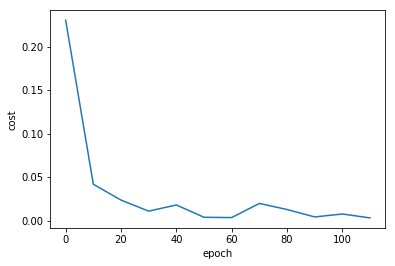

In [59]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [60]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.66886196234438